# Linear Classification
### Kyle McLester

Using the Iris dataset hosted by UCI
- Download link: https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
type(iris.data)

numpy.ndarray

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
type(iris.target)

numpy.ndarray

In [12]:
iris.target.shape

(150,)

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
X = iris.data
T = iris.target

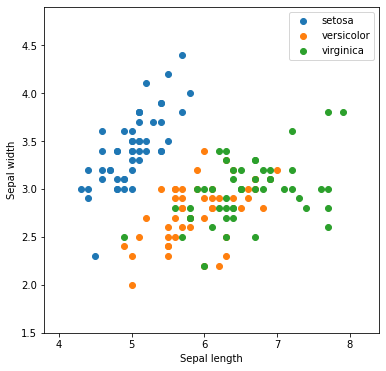

In [15]:
"""
http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

Code source: Gaël Varoquaux
Modified for documentation by Jaques Grobler
License: BSD 3 clause
"""
# Get row locations for each class
setosa_locs = np.where(T == 0)[0].astype(int)
versicolor_locs = np.where(T == 1)[0]
virginica_locs = np.where(T == 2)[0]

# Find min and max x-y coordiantes
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(figsize=(6,6))

# Plot the training points
plt.scatter(X[setosa_locs, 0], X[setosa_locs, 1], label='setosa')
plt.scatter(X[versicolor_locs, 0], X[versicolor_locs, 1], label='versicolor')
plt.scatter(X[virginica_locs, 0], X[virginica_locs, 1], label='virginica')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend() # Plots legend
plt.show()

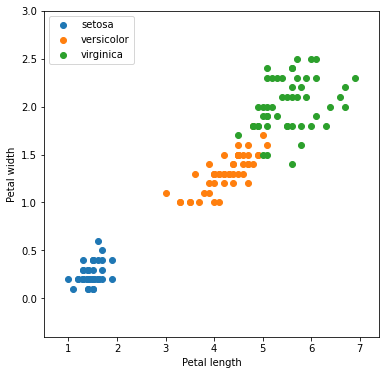

In [16]:
# Get row locations for each class
setosa_locs = np.where(T == 0)[0].astype(int)
versicolor_locs = np.where(T == 1)[0]
virginica_locs = np.where(T == 2)[0]

# Find min and max x-y coordiantes
x_min, x_max = X[:, 2].min() - .5, X[:, 2].max() + .5
y_min, y_max = X[:, 3].min() - .5, X[:, 3].max() + .5

plt.figure(figsize=(6,6))

# Plot petal width and length for each class
plt.scatter(X[setosa_locs, 2], X[setosa_locs, 3], label='setosa')
plt.scatter(X[versicolor_locs, 2], X[versicolor_locs, 3], label='versicolor')
plt.scatter(X[virginica_locs, 2], X[virginica_locs, 3], label='virginica')

plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.legend()
plt.show()

In [17]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        numpy array
             input data to partition
    T        numpy array
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
    return
    -------
    
    Xs       list of numpy arrays
    
    Ts       list of numpy arrays
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    # Checks to make sure ratio sums to 1
    assert(np.sum(ratio) == 1)
    
    # Store the number of data samples 
    N = X.shape[0]

    # change the 1d array to 2d if need
    if len(T.shape) == 1:
        T = T.reshape((N,1))
    
    # Shuffle the data indices 
    idxs = np.random.permutation(N)
        
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
         # Number of rows that corresponds to kth element in ratios
        nrows = int(round(N * r)) 
        
        # print (i, nrows)
        # If we are on the last ratio simply use the remaining data samples
        if k == len(ratio)-1:
            Xs.append(X[idxs[i:], :])
            Ts.append(T[idxs[i:], :])
        else:
            Xs.append(X[idxs[i:i+nrows], :])
            Ts.append(T[idxs[i:i+nrows], :])
        
        i += nrows
    
    return Xs, Ts

In [18]:
def partition_data():
    """Partition data into train and test splits."""
    global Xtrain, Xtest, Ttrain, Ttest
    data, targets = partition(copy(X), copy(T))
    # Fill in the right had side of the assignments below
    Xtrain, Xtest = data
    # Fill in the right had side of the assignments below
    Ttrain, Ttest = targets

In [19]:
partition_data()
print("Train data shape: {}".format(Xtrain.shape))
print("Train target shape: {}".format(Ttrain.shape))
print("Test data shape: {}".format(Xtest.shape))
print("Test target shape: {}".format(Ttest.shape))

Train data shape: (120, 4)
Train target shape: (120, 1)
Test data shape: (30, 4)
Test target shape: (30, 1)


## Apply Perceptron Algorithm

We can calculate our prediction by applying the dot product between the current weight vector $w$ and the current data sample vector $x_i$.
\begin{equation}
y = w \cdot x_i
\tag{1}
\end{equation}

We can update our weight vector by taking the element-wise multiplication between the current scalar target $t_i$ and the current data sample vector $x_i$ and then applying our learning-rate $\alpha$ to scale the weight update. Remember that the sign of $t_i$ represents which direction we need to update our weights in!
\begin{equation}
w = w + \alpha t_i x_i
\tag{2}
\end{equation}

In [20]:
np.unique(Ttrain)

array([0, 1, 2])

In [21]:
Ttrain >= 1

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [22]:
Ttrain[Ttrain >= 1] = -1

In [23]:
np.unique(Ttrain)

array([-1,  0])

In [24]:
Ttrain == 0

array([[False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [25]:
Ttrain[Ttrain == 0] = 1

In [26]:
np.unique(Ttrain)

array([-1,  1])

In [27]:
def convert_targets():
    """ Convert partitioned targets to binary targets formatted for the perceptron algorithm."""
    global Xtrain, Xtest, Ttrain, Ttest

    Ttrain[Ttrain >= 1] = -1

    Ttrain[Ttrain == 0] = 1

    Ttest[Ttest >= 1] = -1

    Ttest[Ttest == 0] = 1

In [28]:
partition_data() # Reinitialize partitions
convert_targets() # Convert partition targets to be binary
print("Training targets: {}".format(np.unique(Ttrain)))
print("Test targets: {}".format(np.unique(Ttest)))

Training targets: [-1  1]
Test targets: [-1  1]


In [29]:
def init_data():
    partition_data()
    convert_targets()

converged at  1
End of training:  1


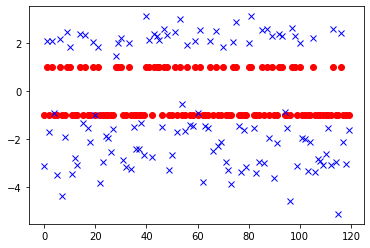

In [30]:
# Reinitialize data partitions and covert targets to binary.
# This ensures that rerunning this cell at any point will work.
init_data()

epcohs = 1000 # Max number passes to make over the data
alpha = 0.1 # Learning-rate

Ntrain = Xtrain.shape[0] # Number of rows in Xtrain
Dtrain = Xtrain.shape[1] # Number of columns in Xtrain

# Adds bias to Xtrain
bias = np.ones((Ntrain, 1))
X1train = np.hstack([bias, Xtrain])

# Randomly initialize weights
w = np.random.random(Dtrain+1) 


for i in range(epcohs):
    converged = True
    for k in range(Ntrain):
        # Make prediction
        y = w @ X1train[k] 
        # Update prediction if prediction does not match target
        if np.sign(y) != np.sign(Ttrain[k]):
            # Update weights
            w += alpha * Ttrain[k] * X1train[k] 
            converged = False
    # If all sings match after full pass over training data then we converged
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
# Compute final prediction of converged weights on the training data
y = X1train @ w
plt.plot(Ttrain, 'ro')
plt.plot(y, 'bx')

In [31]:
y_clipped = np.sign(y) 

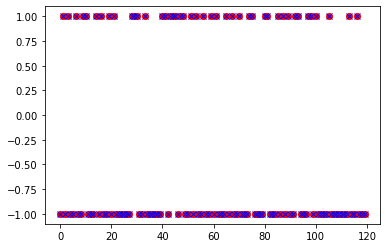

In [32]:
plt.plot(Ttrain, 'ro')
plt.plot(y_clipped, 'bx')

$$
  accuracy = \frac{\text{total number of correct classification}} {\text{total number of data samples}} 
$$

In [33]:
# Set number of data samples in Xtest
Ntest = Xtest.shape[0]

# Add bias to Xtest
bias = np.ones((Ntest, 1))
X1test = np.hstack([bias, Xtest])

# Compute and clip predictions to get predicted classes
ytest = np.sign(X1test @ w)

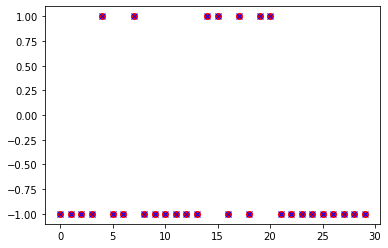

In [34]:
plt.plot(Ttest, 'ro')
plt.plot(ytest, 'bx')

In [35]:
test_acc = np.sum(ytest.flatten()==Ttest.flatten()) / Ntest
print("Test accuracy is: {}%".format(test_acc*100))

Test accuracy is: 100.0%


## Pocket Algorithm

In [36]:
def compare(X, T, w, wp):
    """ Checks number of correct predictions given two weight vectors.
        Args:
            X (np.ndarray): Numpy array of data
            
            T (np.ndarray): Numpy array of targets
            
            w (np.ndarray): Numpy array of weights
            
            wp (np.ndarray): Numpy array of secondary weights
        
        Returns:
            Returns 1 if weights `w` give more correct predictions
            and returns -1 if `wp` give more correct predictions.
    """
    y = np.sign(X @ w)
    yp = np.sign(X @ wp)
    y_correct =  np.sum(y.flatten() == T.flatten())
    yp_correct = np.sum(yp.flatten() == T.flatten())
    return 1 if y_correct >= yp_correct else -1

converged at  1
End of training:  1


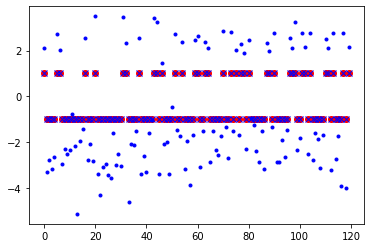

In [37]:
# Reinitialize data partitions and covert targets to binary.
# This ensures that rerunning this cell at any point will work.
init_data()

epcohs = 1000 # Max number passes to make over the data
alpha = 0.1 # Learning-rate

Ntrain = Xtrain.shape[0] # Number of rows in Xtrain
Dtrain = Xtrain.shape[1] # Number of columns in Xtrain

# Adds bias to Xtrain
X1train = np.hstack((np.ones((Ntrain, 1)), Xtrain.reshape((Ntrain, -1))))

# Randomly initialize weights and pocket weights
w = np.random.random(Dtrain+1)
w_pocket = copy(w) # Copy initial weights

for i in range(epcohs):
    converged = True
    for k in range(Ntrain):
        y = w @ X1train[k]
        if np.sign(y) != np.sign(Ttrain[k]):
            w += alpha * Ttrain[k] * X1train[k]
            converged = False
            if compare(X=X1train, T=Ttrain, w=w, wp=w_pocket) > 0:
                w_pocket[:] = w[:]  
                # OR the less memory efficient way
                # w_pocket = copy(w)
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)

y = X1train @ w_pocket
plt.plot(Ttrain, 'ro')
plt.plot(y, 'b.')
plt.plot(np.sign(y), 'bx')

In [38]:
ytrain_pocket = np.sign(y)
acc = np.sum(ytrain_pocket.flatten()==Ttrain.flatten()) / Ntrain
print("Train accuracy is: {}%".format(acc*100))

Train accuracy is: 100.0%


In [39]:
# Set number of data samples in Xtest
Ntest = Xtest.shape[0]

# Add bias to Xtest
bias = np.ones((Ntest, 1))
X1test = np.hstack([bias, Xtest])

# Compute and clip predictions to get predicted classes
ytest_pocket = np.sign(X1test @ w_pocket)

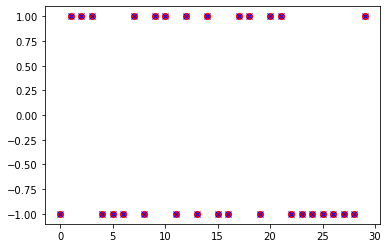

In [40]:
plt.plot(Ttest, 'ro')
plt.plot(ytest_pocket, 'bx')

In [41]:
# Compute accuracy
test_acc_pocket = np.sum(ytest_pocket.flatten()==Ttest.flatten()) / Ntest
print("Test accuracy is: {}%".format(test_acc_pocket*100))

Test accuracy is: 100.0%
